# Installation

+ [Documentación](https://pysd.readthedocs.io/en/master/index.html)
    + [Installation](https://pysd.readthedocs.io/en/master/installation.html)
+ [Cookbook](https://pysd-cookbook.readthedocs.io/en/latest/)
+ Test Data from [Models for testing system dynamics translation, simulation, and display software](https://github.com/SDXorg/test-models/tree/master)

In [1]:
### No he conseguido instalar pymc con pip, así que lo hago con conda en un entorno conda
! conda update -n base -c defaults conda

### pysd parece que también puede instalarse con conda: 
! conda install -c conda-forge pysd
# ! pip install pysd 

### Optional Dependencies
! pip install matplotlib netCDF4 dask[array] dask[diagnostics] dask[distributed] Scikit-learn NetworkX GeoPandas

### Para PyMC - https://www.pymc.io/projects/docs/en/stable/installation.html
! conda install "pymc>=5"
! conda install -c conda-forge numpyro
! conda install -c conda-forge blackjax
! conda install -c conda-forge nutpie
# ! pip install numpyro blackjax nutpie

### Optional for cookbook
! pip install db-sqlite3

  Using cached pysd-3.12.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached parsimonious-0.10.0-py3-none-any.whl (48 kB)
  Using cached xarray-2023.11.0-py3-none-any.whl.metadata (11 kB)
  Using cached lxml-4.9.3-cp311-cp311-win_amd64.whl.metadata (3.9 kB)
  Using cached regex-2023.10.3-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached black-23.11.0-cp311-cp311-win_amd64.whl.metadata (66 kB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 262.6 kB/s eta 0:00:01
     ---------------------------

In [4]:
import pysd

from utils import globalsettings as gs

%reload_ext autoreload
%autoreload 2

# Getting Started

![figure](../../outputs/files/vensim_screenshot.png)

In [5]:
model = pysd.read_vensim(gs.the_files.TEA_CUP_MODEL)

In [6]:
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Characteristic Time,characteristic_time,None,Minutes,"(0.0, nan)",Constant,Normal,How long will it take the teacup to cool 1/e o...
1,FINAL TIME,final_time,None,Minute,"(nan, nan)",Constant,Normal,The final time for the simulation.
2,Heat Loss to Room,heat_loss_to_room,None,Degrees Fahrenheit/Minute,"(nan, nan)",Auxiliary,Normal,This is the rate at which heat flows from the ...
3,INITIAL TIME,initial_time,None,Minute,"(nan, nan)",Constant,Normal,The initial time for the simulation.
4,Room Temperature,room_temperature,None,Degrees Fahrenheit,"(-459.67, nan)",Constant,Normal,Put in a check to ensure the room temperature ...
5,SAVEPER,saveper,None,Minute,"(0.0, nan)",Auxiliary,Normal,The frequency with which output is stored.
6,TIME STEP,time_step,None,Minute,"(0.0, nan)",Constant,Normal,The time step for the simulation.
7,Teacup Temperature,teacup_temperature,None,Degrees Fahrenheit,"(32.0, 212.0)",Stateful,Integ,The model is only valid for the liquid phase o...
8,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.


In [7]:
stocks = model.run()
stocks

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
0.000,30,0,0.125,0.125,10,11.000000,70,180.000000
0.125,30,0,0.125,0.125,10,10.862500,70,178.625000
0.250,30,0,0.125,0.125,10,10.726719,70,177.267188
0.375,30,0,0.125,0.125,10,10.592635,70,175.926348
0.500,30,0,0.125,0.125,10,10.460227,70,174.602268
...,...,...,...,...,...,...,...,...
29.500,30,0,0.125,0.125,10,0.565131,70,75.651312
29.625,30,0,0.125,0.125,10,0.558067,70,75.580671
29.750,30,0,0.125,0.125,10,0.551091,70,75.510912
29.875,30,0,0.125,0.125,10,0.544203,70,75.442026


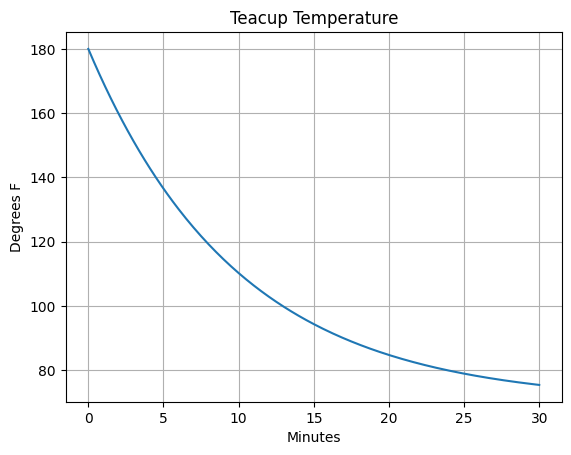

In [8]:
import matplotlib.pyplot as plt

stocks["Teacup Temperature"].plot()
plt.title("Teacup Temperature")
plt.ylabel("Degrees F")
plt.xlabel("Minutes")
plt.grid()

In [9]:
stocks = model.run(progress=True)

ETA:  --:--:-- [----------------------------------------------------------]  0%
ETA:   0:00:00 [################------------------------------------------] 27%
ETA:   0:00:00 [#######################################-------------------] 67%
Time:  0:00:00 [##########################################################]100%


In [10]:
model['Teacup Temperature']

75.37400067686977

In [11]:
model = pysd.read_vensim(gs.the_files.TEA_CUP_MODEL)
tseries = range(30)

print('''CREATE TABLE simulations
             (room_temperature real, init_teacup_temperature real,
              %s ) '''%', '.join(['t%i real'%i for i in tseries]))

CREATE TABLE simulations
             (room_temperature real, init_teacup_temperature real,
              t0 real, t1 real, t2 real, t3 real, t4 real, t5 real, t6 real, t7 real, t8 real, t9 real, t10 real, t11 real, t12 real, t13 real, t14 real, t15 real, t16 real, t17 real, t18 real, t19 real, t20 real, t21 real, t22 real, t23 real, t24 real, t25 real, t26 real, t27 real, t28 real, t29 real ) 


In [ ]:
import sqlite3

conn = sqlite3.connect(gs.the_files.EXAMPLE_DB)
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE simulations
             (room_temperature real, init_teacup_temperature real,
              %s ) '''%', '.join(['t%i real'%i for i in tseries]));

In [13]:
import numpy as np 

room_temps = np.random.normal(75, 5, 100)
init_tea_temps = np.random.normal(175, 15, 100)

In [16]:
for room_temp, init_tea_temp in zip(room_temps, init_tea_temps):
    output = model.run(params={'room_temperature':room_temp},
                       initial_condition=(0,{'teacup_temperature':init_tea_temp}),
                       return_timestamps=tseries)

    c.execute("INSERT INTO simulations VALUES (%i,%i,%s)"%
              (room_temp, init_tea_temp, ', '.join(output['Teacup Temperature'].apply(str))))

    conn.commit()

In [17]:
c.execute('SELECT * FROM simulations')
c.fetchone()

(69.0,
 199.0,
 199.6301184627497,
 187.2125829904155,
 175.9838115050837,
 165.83000044082578,
 156.6482409524146,
 148.3454759344809,
 140.83755688802455,
 134.04839107562503,
 127.90917032177188,
 122.35767364220844,
 117.33763663443987,
 112.79818123817944,
 108.69330008635748,
 104.98139022059163,
 101.62483144532617,
 98.5896050472608,
 95.84494901579174,
 93.3630462701247,
 91.11874273324304,
 89.0892923954113,
 87.2541267834335,
 85.59464649923792,
 84.0940327150324,
 82.73707671453418,
 81.5100257526753,
 80.40044367157174,
 79.39708486009987,
 78.48978027966093,
 77.66933440100472,
 76.92743200756777)

In [18]:
conn.close()